## Importing Libraries/ Read Dataset

In [108]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [4]:
creditcard_df = pd.read_csv('Marketing_data.csv')

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [5]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
creditcard_df.describe()

# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# Let's see who made one off purchase of $40761!
creditcard_df.query('ONEOFF_PURCHASES >= 40761')
# they make a lot of one time purchases and frequently leave money on their bank account
# so a product on cash advance wouldnt be a good recommendation for this client
# they pay the payments in full ammount at a 25% rate

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


## Data Analysis

<Axes: >

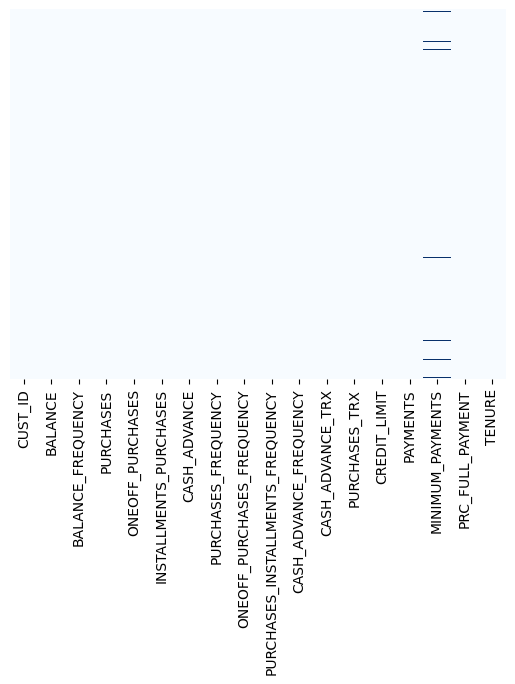

In [8]:
# Let's see if we have any missing data, luckily we don't!

sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.fillna(creditcard_df.mean(), inplace=True)

In [11]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [13]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop(columns= ['CUST_ID'], inplace= True)

In [14]:
n = len(creditcard_df.columns)
n

17

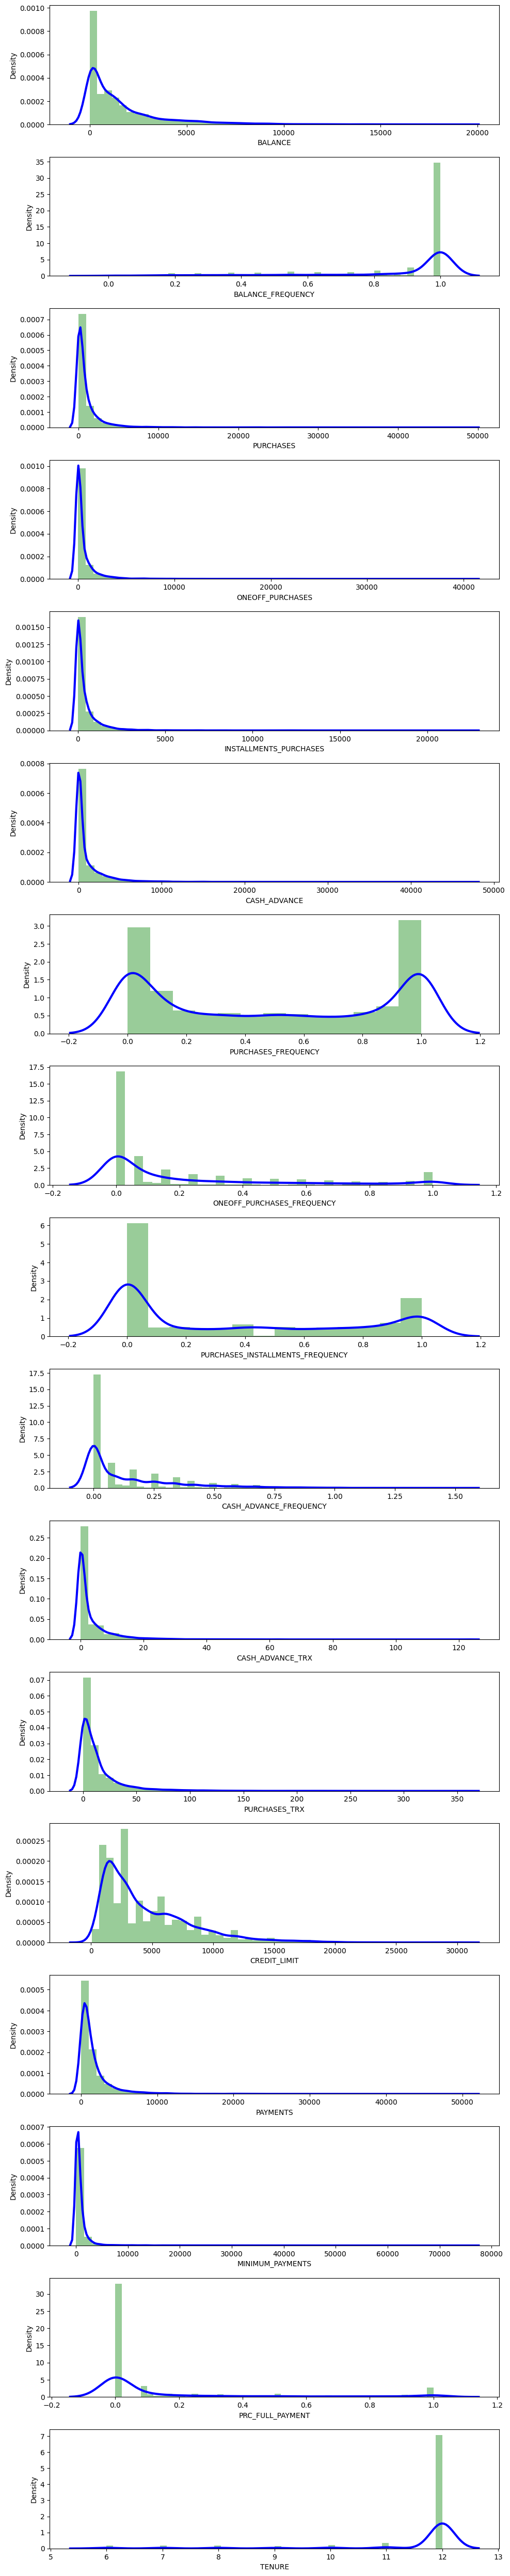

In [15]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure
plt.figure(figsize=(10,50))
for index, var in enumerate(creditcard_df.columns, start= 1):
    plt.subplot(17, 1, index)
    sns.distplot(creditcard_df[var], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'g'})
    
plt.tight_layout()

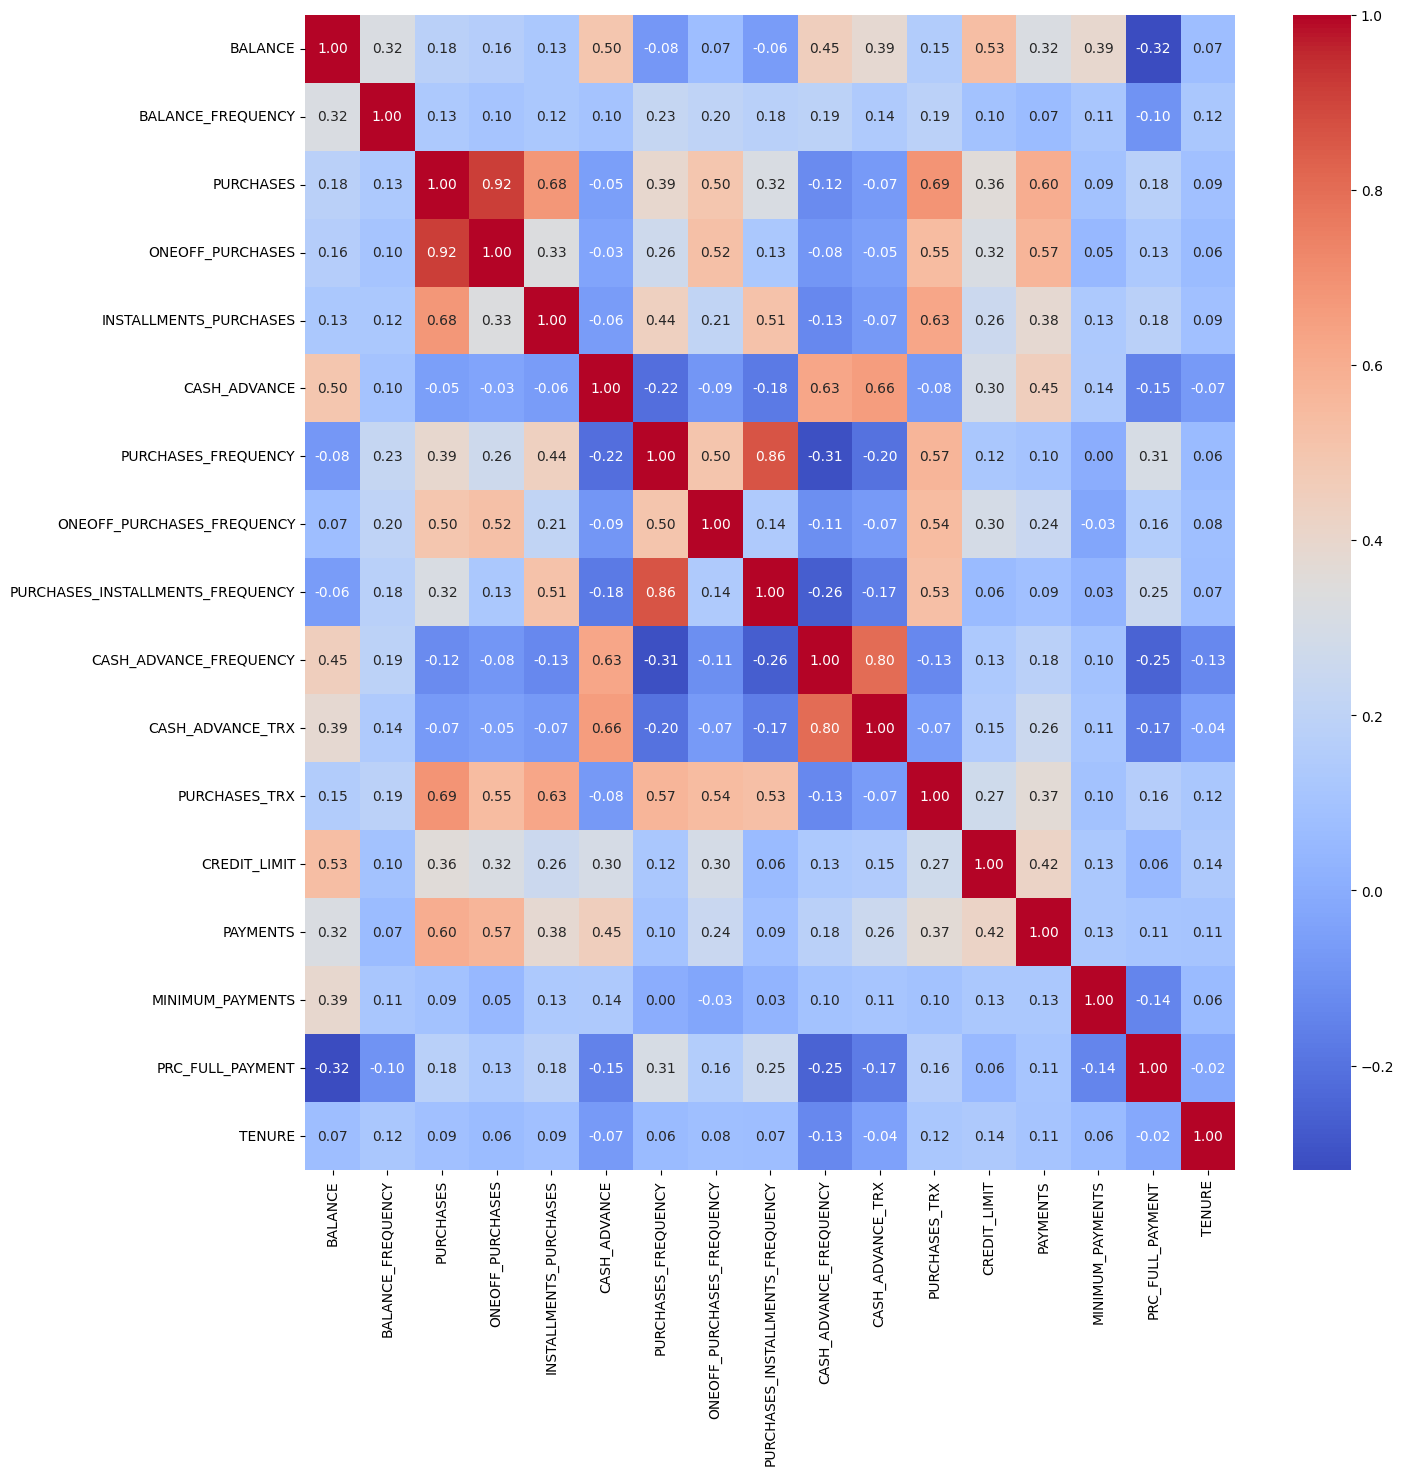

In [16]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'
plt.figure(figsize=(15,15))
sns.heatmap(creditcard_df.corr(), cmap = 'coolwarm', annot= True, fmt= '.2f')
plt.show()

## Elbow Method: finding the optimal number of clusters

In [17]:
# Let's scale the data first
scaler = StandardScaler()

creditcard_df_scaled = pd.DataFrame(data = scaler.fit_transform(creditcard_df), columns= scaler.get_feature_names_out())

In [26]:
score_1 = []
silhouette_1 = []

range_values = range(2,20)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(creditcard_df_scaled)
    score_1.append(kmeans.inertia_)
    silhouette_1.append(silhouette_score(creditcard_df_scaled, kmeans.labels_))

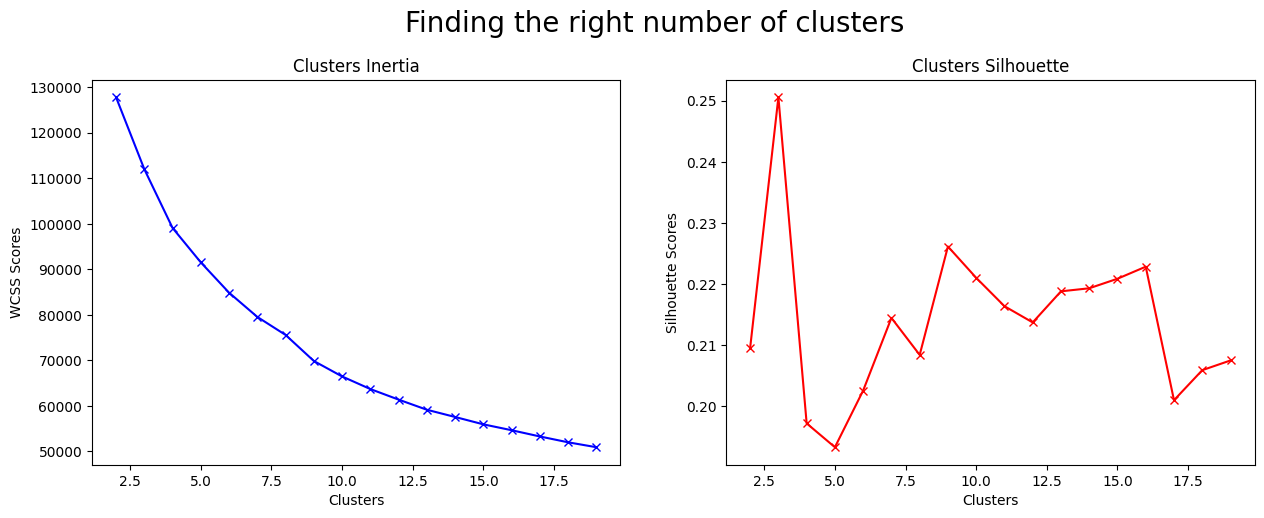

In [107]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

axes[0].plot(range(2,20), score_1, 'bx-')
axes[0].set_title('Clusters Inertia')
axes[0].set_xlabel('Clusters')
axes[0].set_ylabel('WCSS Scores')

axes[1].plot(range(2,20), silhouette_1, 'bx-', color= 'r')
axes[1].set_title('Clusters Silhouette')
axes[1].set_xlabel('Clusters')
axes[1].set_ylabel('Silhouette Scores')

fig.suptitle('Finding the right number of clusters', y= 1.02, fontsize= 20)

plt.show()
# Inertia:
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Silhouette:
# they are all ranging from 0.20 to 0.25 so there is not big difference between them

# Let's choose the number of clusters to be 8.

## K-MEANS: applying kmeans to create our clusters

In [21]:
kmeans = KMeans(n_clusters= 8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [23]:
labels.shape

(8950,)

In [62]:
labels.min(), labels.max(),

(0, 7)

In [63]:
creditcard_df_cluster =  pd.concat([creditcard_df, pd.Series(labels, name='CLUSTER')], axis=1)

In [64]:
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


## PCA: applying pricipal component analysis to visualize our clusters

In [65]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
pca_df = pd.concat([pd.DataFrame(principal_comp, columns=['x', 'y']), pd.Series(labels, name='CLUSTER')], axis=1)

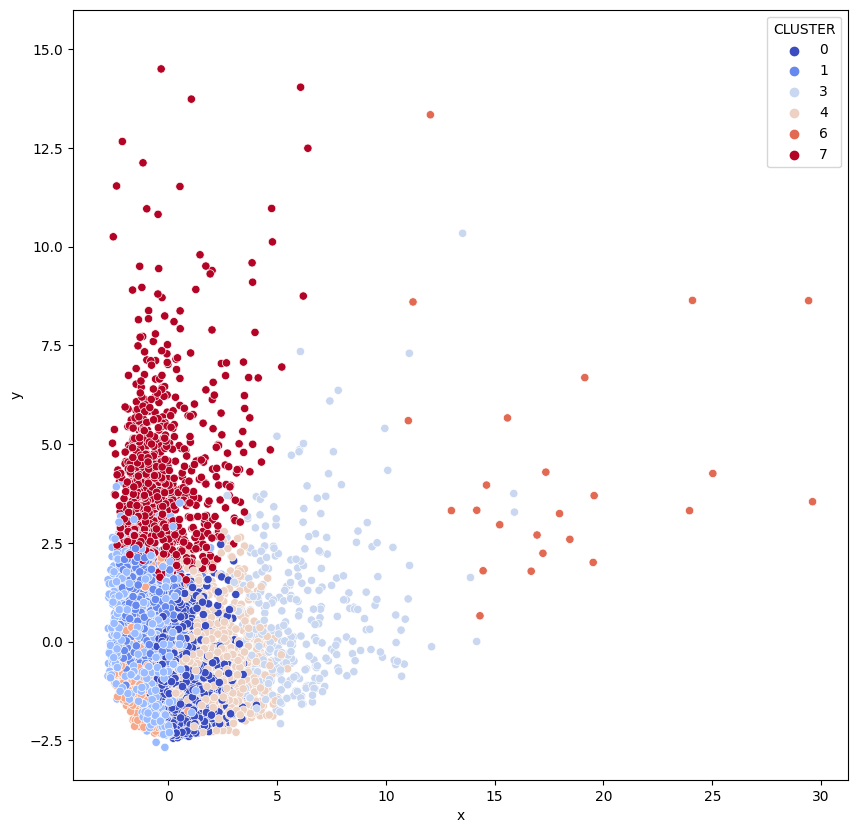

In [66]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= 'x', 
                y = 'y', 
                hue='CLUSTER', 
                data= pca_df,
                palette='coolwarm')
plt.ylim(-3.5,16)
plt.show()

## Deep Learning: Creating an AutoEncoder to reduce the dimensionality of our features

In [67]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [68]:
# we will built a neural network to use autoencoders to apply dimensionality reduction to our feature before building a new kmeans clusters
# we will feed into our autoencoder the creditcard_df_scaled as input and output
# and will create a bottleneck in the middle reducing the number of features
# so you can see the first layers of our neural network as encoders
# and the last layers as our decoders

input_df = Input(shape = (17,))

x = Dense(7, activation='relu')(input_df)
x = Dense(500,  activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500,  activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000,  activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10,  activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000,  activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500,  activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss= 'mean_squared_error') 

In [69]:
autoencoder.fit(creditcard_df_scaled.values, creditcard_df_scaled.values, batch_size= 128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 1s 11ms/step - loss: 0.4811
Epoch 2/25
70/70 [==============================] - 1s 11ms/step - loss: 0.2472
Epoch 3/25
70/70 [==============================] - 1s 11ms/step - loss: 0.2072
Epoch 4/25
70/70 [==============================] - 1s 11ms/step - loss: 0.1635
Epoch 5/25
70/70 [==============================] - 1s 13ms/step - loss: 0.1496
Epoch 6/25
70/70 [==============================] - 1s 13ms/step - loss: 0.1224
Epoch 7/25
70/70 [==============================] - 1s 12ms/step - loss: 0.1111
Epoch 8/25
70/70 [==============================] - 1s 11ms/step - loss: 0.1014
Epoch 9/25
70/70 [==============================] - 1s 11ms/step - loss: 0.0934
Epoch 10/25
70/70 [==============================] - 1s 11ms/step - loss: 0.0891
Epoch 11/25
70/70 [==============================] - 1s 11ms/step - loss: 0.0874
Epoch 12/25
70/70 [==============================] - 1s 12ms/step - loss: 0.0767
Epoch 13/25
70/70 [==================

In [70]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [71]:
# now that our network is trained and the weights have been set we can apply dimensionality reduction (or encode our features)
pred = encoder.predict(creditcard_df_scaled.values)

280/280 [==============================] - 0s 1ms/step


In [72]:
pred.shape

(8950, 10)

In [82]:
scores_2 = []
silhouette_2 = []

range_values = range(2, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)
  silhouette_2.append(silhouette_score(pred, kmeans.labels_))

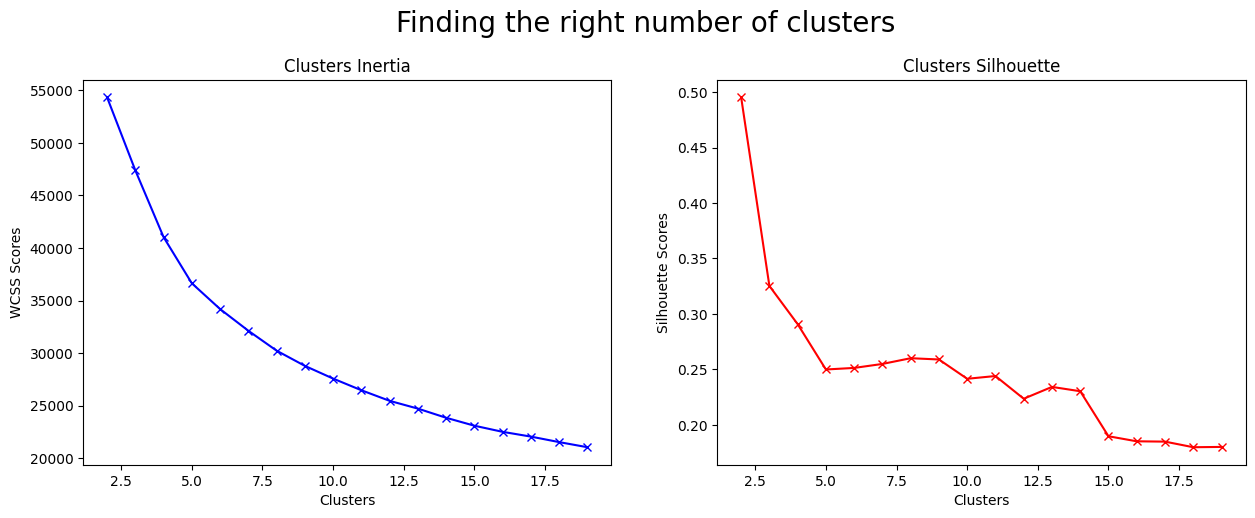

In [104]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

axes[0].plot(range(2,20), scores_2, 'bx-')
axes[0].set_title('Clusters Inertia')
axes[0].set_xlabel('Clusters')
axes[0].set_ylabel('WCSS Scores')

axes[1].plot(range(2,20), silhouette_2, 'bx-', color= 'r')
axes[1].set_title('Clusters Silhouette')
axes[1].set_xlabel('Clusters')
axes[1].set_ylabel('Silhouette Scores')

fig.suptitle('Finding the right number of clusters', y= 1.02, fontsize= 20)

plt.show()

## Cluster Comparison

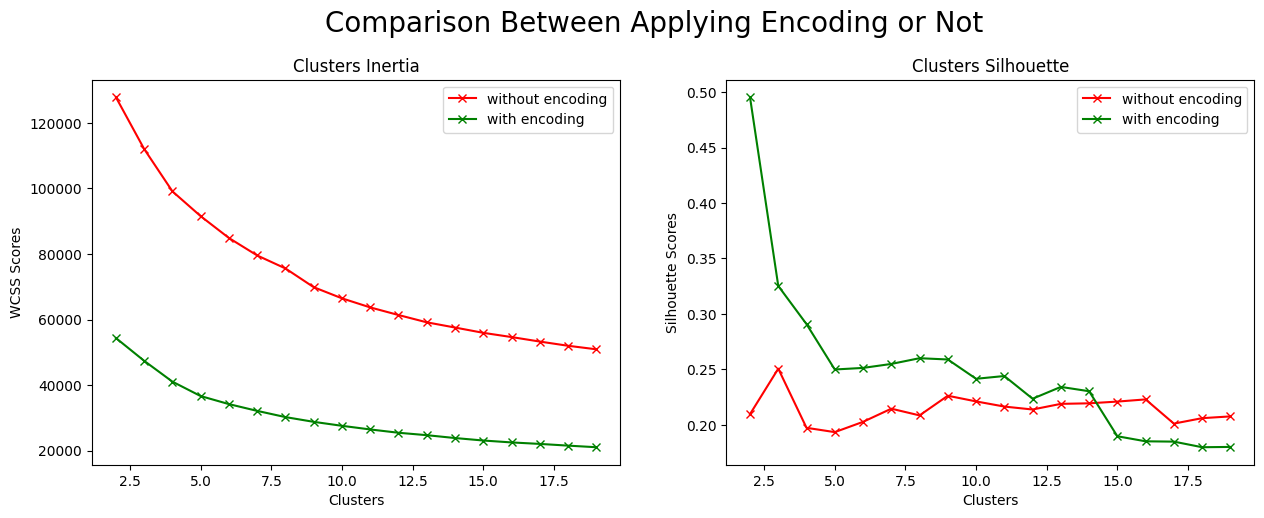

In [106]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

axes[0].plot(range(2,20), score_1, 'bx-', color = 'r', label= 'without encoding')
axes[0].plot(range(2,20), scores_2, 'bx-', color = 'g', label= 'with encoding')
axes[0].set_title('Clusters Inertia')
axes[0].set_xlabel('Clusters')
axes[0].set_ylabel('WCSS Scores') 
axes[0].legend()

axes[1].plot(range(2,20), silhouette_1, 'bx-', color = 'r', label= 'without encoding')
axes[1].plot(range(2,20), silhouette_2, 'bx-', color = 'g', label= 'with encoding')
axes[1].set_title('Clusters Silhouette')
axes[1].set_xlabel('Clusters')
axes[1].set_ylabel('Silhouette Scores')
axes[1].legend()

fig.suptitle('Comparison Between Applying Encoding or Not', y= 1.02, fontsize= 20)

plt.show()

# we can see that not only are we getting lower WCSS scores but also higher Silhouette scores 
# meaning the average distances between points in a cluster are smaller in a smaller K
# and clusters are not as close to each other as they where before

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve, and it has a good silhouette score
# so let's go with that number of cluster

In [99]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [100]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [101]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['x','y'])
pca_df.head()

,x,y
0,-1.495326,-0.248245
1,-0.017981,1.348784
2,0.270135,-0.504956
3,0.094284,0.261534
4,-1.720491,-0.290600


In [102]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,x,y,cluster
0,-1.495326,-0.248245,2
1,-0.017981,1.348784,0
2,0.270135,-0.504956,2
3,0.094284,0.261534,2
4,-1.720491,-0.290600,2


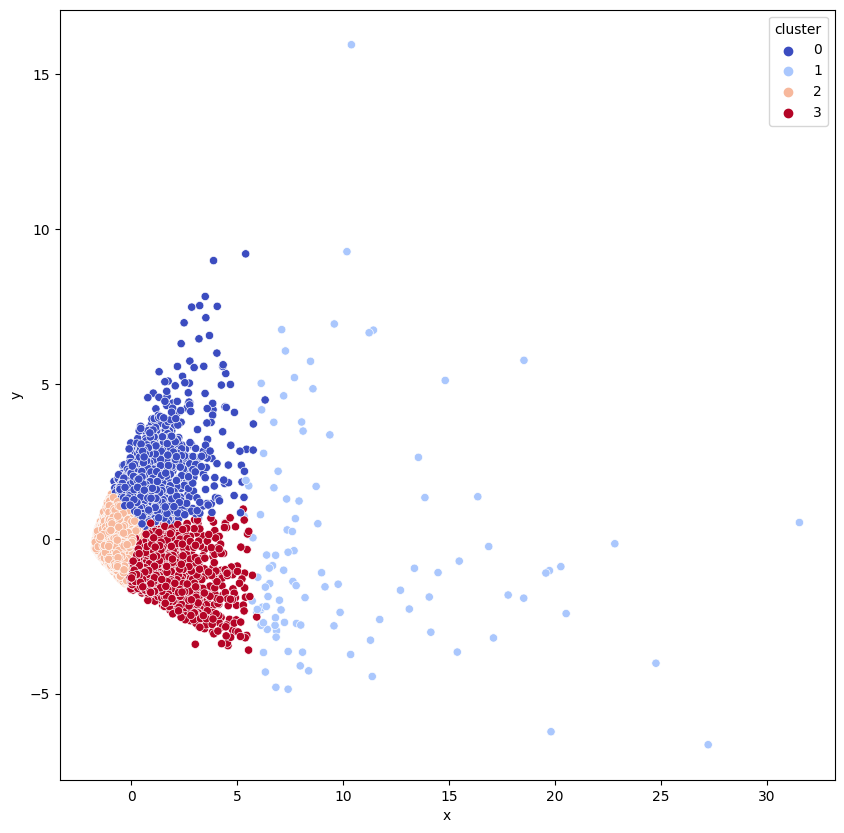

In [103]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="x", y="y", hue = "cluster", data = pca_df, palette = 'coolwarm')
plt.show()